# NAIVE BAYES CLASSIFIER

## Understand the data

### Automobile accidents

The file Accidents.csv contains information on 42,183 actual automobile accidents in 2001 in the United States that involved one of three levels of injury: NO INJURY, INJURY, or FATALITY. For each accident, additional information is recorded, such as day of week, weather conditions, and road type. <br>
A firm might be interested in developing a system for quickly classifying the severity of an
accident based on initial reports and associated data in the system (some of which rely
on GPS-assisted reporting). <br>

## Objective
* predict whether the accident will be a serious one based on the provided data

## Implement the model using Python

#### Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

% matplotlib inline

#### Load Pima Dataset

In [7]:
df=pd.read_csv('accidents.csv')
df.head()


,RushHour,WRK_ZONE,WKDY,INT_HWY,LGTCON_day,LEVEL,SPD_LIM,SUR_COND_dry,TRAF_two_way,WEATHER_adverse,MAX_SEV
0,1,0,1,1,0,1,70,0,0,1,0
1,1,0,1,0,0,0,55,0,1,0,1
2,1,0,0,0,0,0,35,0,0,1,0
3,1,0,1,0,0,1,35,0,0,1,0
4,1,0,1,0,0,0,25,0,0,1,1


#### NO OF Rows and Columns in the data

In [8]:
df.shape

(600, 11)

#### Summary of the data

In [9]:
df.describe()

,RushHour,WRK_ZONE,WKDY,INT_HWY,LGTCON_day,LEVEL,SPD_LIM,SUR_COND_dry,TRAF_two_way,WEATHER_adverse,MAX_SEV
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.458333,0.011667,0.795000,0.146667,0.73000,0.230000,43.291667,0.785000,0.583333,0.161667,0.513333
std,0.498677,0.107470,0.404038,0.495545,0.44433,0.421184,12.269508,0.411165,0.493418,0.368452,0.500239
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,40.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,55.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,9.000000,1.00000,1.000000,75.000000,1.000000,1.000000,1.000000,1.000000


#### check to if DATA is in which Form Numeric or Categorical?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
RushHour           600 non-null int64
WRK_ZONE           600 non-null int64
WKDY               600 non-null int64
INT_HWY            600 non-null int64
LGTCON_day         600 non-null int64
LEVEL              600 non-null int64
SPD_LIM            600 non-null int64
SUR_COND_dry       600 non-null int64
TRAF_two_way       600 non-null int64
WEATHER_adverse    600 non-null int64
MAX_SEV            600 non-null int64
dtypes: int64(11)
memory usage: 51.6 KB


In [14]:
#Convert relevant variables to categorical variables
df['RushHour'] = df['RushHour'].astype('category')
df['WRK_ZONE'] = df['WRK_ZONE'].astype('category')
df['WKDY'] = df['WKDY'].astype('category')
df['INT_HWY'] = df['INT_HWY'].astype('category')
df['LGTCON_day'] = df['LGTCON_day'].astype('category')
df['LEVEL'] = df['LEVEL'].astype('category')
df['SUR_COND_dry'] = df['SUR_COND_dry'].astype('category')
df['TRAF_two_way'] = df['TRAF_two_way'].astype('category')
df['WEATHER_adverse'] = df['WEATHER_adverse'].astype('category')
df['MAX_SEV'] = df['MAX_SEV'].astype('category')

#### Check if any Null values?

In [15]:
df.isnull().sum()

RushHour           0
WRK_ZONE           0
WKDY               0
INT_HWY            0
LGTCON_day         0
LEVEL              0
SPD_LIM            0
SUR_COND_dry       0
TRAF_two_way       0
WEATHER_adverse    0
MAX_SEV            0
dtype: int64

#### NO Null Values in the data

In [17]:
df['MAX_SEV'].value_counts(normalize=True)

1    0.513333
0    0.486667
Name: MAX_SEV, dtype: float64

#### Grouping Based On Outcome

In [18]:
#Group numerical variables by mean
df.groupby("MAX_SEV").mean()

,SPD_LIM
MAX_SEV,
0,43.750000
1,42.857143


### Histogram on the Data

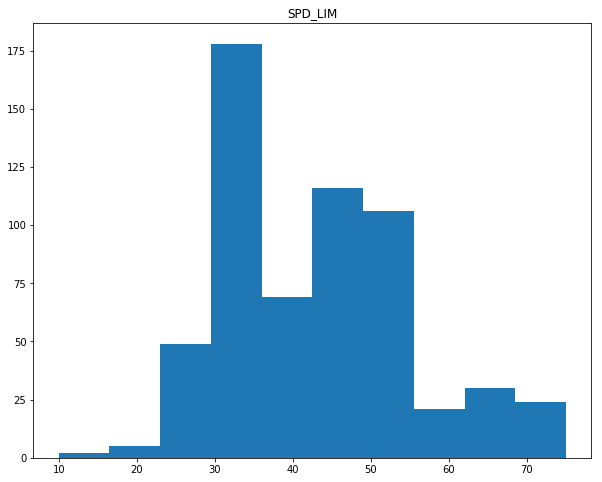

In [19]:
df.hist(figsize=(10,8), grid=False)
plt.show()

#### BOXPLOT on the data (Outlier Detection)

SPD_LIM    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

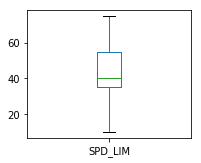

In [20]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

#### Featues

In [21]:
#Create dataframes for X and Y variables
x = df.drop(["MAX_SEV"], axis=1)
y = df[['MAX_SEV']]


In [22]:
##Convert x to dummy variables
x=pd.get_dummies(x, drop_first=True)

In [23]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

#### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Classifier Invoking

In [27]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)


c:\python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [28]:
y_pred_G = classifier.predict(X_test)

#### Evaluation Metrics

In [29]:
cm_G = confusion_matrix(y_test, y_pred_G)
cm_G

array([[24, 53],
       [36, 67]], dtype=int64)

In [30]:
from sklearn.naive_bayes import BernoulliNB

optimal_alpha = 1
NB_optimal = BernoulliNB(alpha=optimal_alpha)

# fitting the model
NB_optimal.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [32]:
y_pred_B = NB_optimal.predict(X_test)

In [48]:
NB_optimal.feature_count_

array([[112.,  98.,   1., 171.,  29.,   0., 146.,  47., 158., 125.,  44.],
       [100.,  90.,   1., 156.,  23.,   0., 154.,  50., 173., 124.,  19.]])

In [53]:
sorted(zip(NB_optimal.feature_count_[1], x.columns), reverse=True)

[('WRK_ZONE_1', 1.0),
 ('WKDY_1', 156.0),
 ('WEATHER_adverse_1', 19.0),
 ('TRAF_two_way_1', 124.0),
 ('SUR_COND_dry_1', 173.0),
 ('SPD_LIM', 100.0),
 ('RushHour_1', 90.0),
 ('LGTCON_day_1', 154.0),
 ('LEVEL_1', 50.0),
 ('INT_HWY_9', 0.0),
 ('INT_HWY_1', 23.0)]

In [54]:
topn_class2 = sorted(zip(NB_optimal.feature_count_[1], x.columns),reverse=True)[:12]
topn_class2

[(173.0, 'SUR_COND_dry_1'),
 (156.0, 'WKDY_1'),
 (154.0, 'LGTCON_day_1'),
 (124.0, 'TRAF_two_way_1'),
 (100.0, 'SPD_LIM'),
 (90.0, 'RushHour_1'),
 (50.0, 'LEVEL_1'),
 (23.0, 'INT_HWY_1'),
 (19.0, 'WEATHER_adverse_1'),
 (1.0, 'WRK_ZONE_1'),
 (0.0, 'INT_HWY_9')]

In [55]:
topn_class1 = sorted(zip(NB_optimal.feature_count_[0], x.columns),reverse=True)[:12]
topn_class1

[(171.0, 'WKDY_1'),
 (158.0, 'SUR_COND_dry_1'),
 (146.0, 'LGTCON_day_1'),
 (125.0, 'TRAF_two_way_1'),
 (112.0, 'SPD_LIM'),
 (98.0, 'RushHour_1'),
 (47.0, 'LEVEL_1'),
 (44.0, 'WEATHER_adverse_1'),
 (29.0, 'INT_HWY_1'),
 (1.0, 'WRK_ZONE_1'),
 (0.0, 'INT_HWY_9')]

In [35]:
cm_G = confusion_matrix(y_test, y_pred_G)
cm_B = confusion_matrix(y_test, y_pred_B)

print(cm_G)
print(cm_B)

[[24 53]
 [36 67]]
[[27 50]
 [44 59]]


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix



In [37]:
y_scores = NB_optimal.predict_proba(X_test)[:, 1]

In [38]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [39]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    
   

In [40]:
precision_recall_threshold(p, r, thresholds, 0.17)

     pred_neg  pred_pos
neg         4        73
pos         3       100


In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

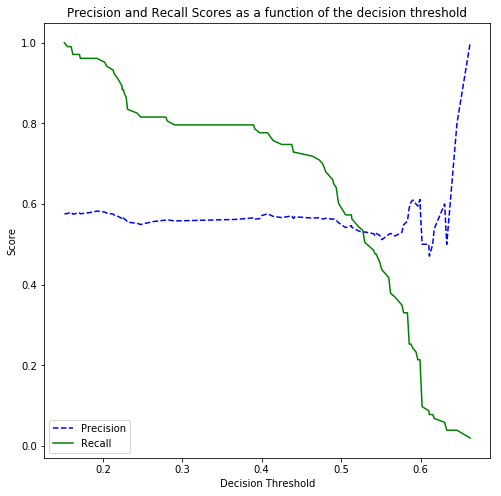

In [42]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

In [43]:
# store the predicted probabilities for class 1
y_pred_prob = NB_optimal.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([0.5484868 , 0.59968081, 0.49378199, 0.55991013, 0.4726656 ,
       0.47700642, 0.59968081, 0.63292893, 0.54282875, 0.59968081,
       0.48943137, 0.38988729, 0.49054091, 0.51346956, 0.56778504,
       0.54404746, 0.58345417, 0.64582662, 0.61718968])

Text(0,0.5,'Frequency')

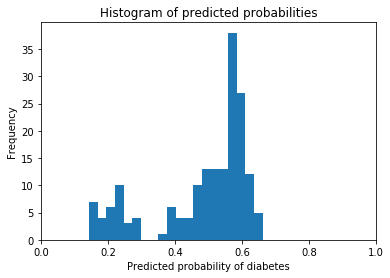

In [44]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [47]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(classifier.predict_proba(X_test))
threshold_list = [0.3,0.4,0.41, 0.45, 0.5,0.55, 0.6]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.3 ******
Our testing accuracy is 0.53
[[14 63]
 [22 81]]

******** For i = 0.4 ******
Our testing accuracy is 0.52
[[20 57]
 [29 74]]

******** For i = 0.41 ******
Our testing accuracy is 0.52
[[20 57]
 [29 74]]

******** For i = 0.45 ******
Our testing accuracy is 0.52
[[23 54]
 [32 71]]

******** For i = 0.5 ******
Our testing accuracy is 0.51
[[24 53]
 [36 67]]

******** For i = 0.55 ******
Our testing accuracy is 0.51
[[27 50]
 [39 64]]

******** For i = 0.6 ******
Our testing accuracy is 0.47
[[29 48]
 [47 56]]
